In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def show_images(images):
    n = len(images)
    for i in range(n):
        img, title = images[i]
        plt.figure()
        plt.title(title)
        plt.imshow(img, cmap="gray")
    plt.show(block=True)

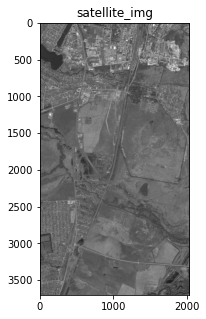

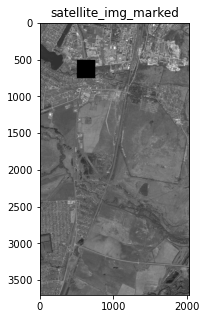

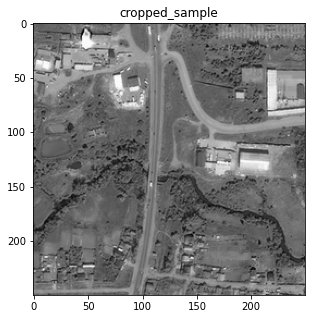

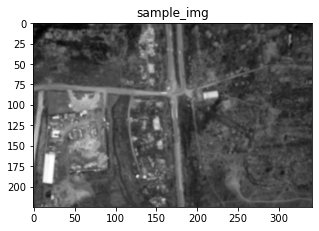

In [12]:
satellite_img = cv2.imread("./img/Amap_pirogovo_50_85.png", cv2.IMREAD_GRAYSCALE)
sample_img = cv2.imread("./img/samlpe.png", cv2.IMREAD_GRAYSCALE)
satellite_img_marked = (np.copy(satellite_img))
satellite_img_marked[500:750, 500:750] = 0
crop_img = satellite_img[500:750, 500:750]
show_images([(satellite_img, "satellite_img"), (satellite_img_marked, "satellite_img_marked"), (crop_img, "cropped_sample"), (sample_img, "sample_img")])
del satellite_img_marked

In [4]:
def test_correlation_function(src_img, test_image):
    methods = [
        (cv2.TM_CCOEFF, "TM_CCOEFF"),
        (cv2.TM_CCOEFF_NORMED, "TM_CCOEFF_NORMED"),
        (cv2.TM_CCORR, "TM_CCORR"),
        (cv2.TM_CCORR_NORMED, "TM_CCORR_NORMED"),
        (cv2.TM_SQDIFF, "TM_SQDIFF"),
        (cv2.TM_SQDIFF_NORMED, "TM_SQDIFF_NORMED")
    ]
    results = []
    for m in methods:
        method, title = m
        img = np.copy(src_img)
        w, h = test_image.shape
        res = cv2.matchTemplate(img, test_image, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img, top_left, bottom_right, 255, 10)
        results.append((res, img, title))
    return results

def test_and_print_images(src_img, test_image):
    for r in test_correlation_function(src_img, test_image):
        res, img, title = r
        plt.rcParams["figure.figsize"] = (5, 5)
        plt.subplot(1, 2, 1), plt.imshow(res, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(1, 2, 2), plt.imshow(img, cmap='gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(title)
        plt.show()

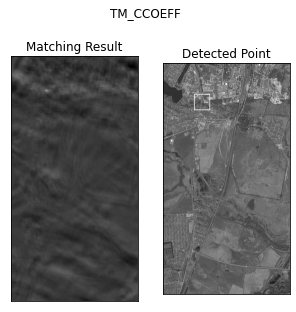

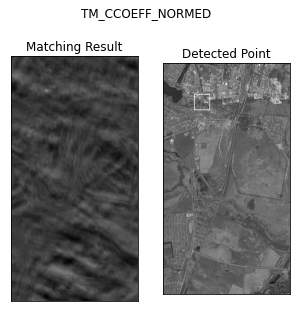

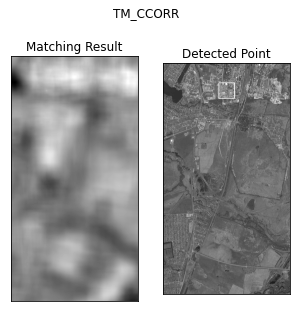

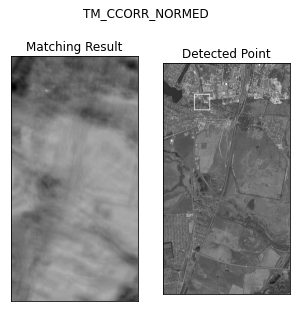

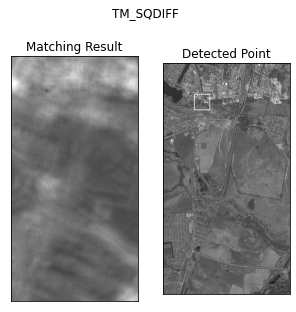

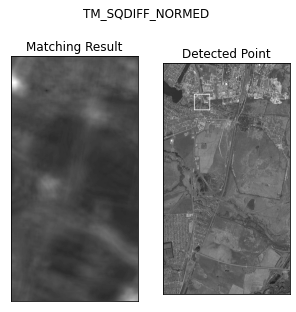

In [5]:
test_and_print_images(satellite_img, crop_img)

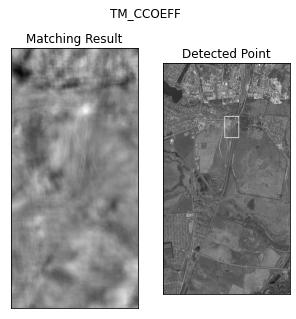

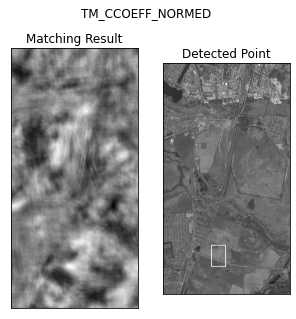

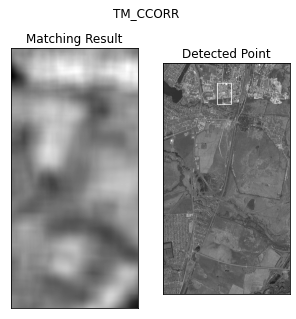

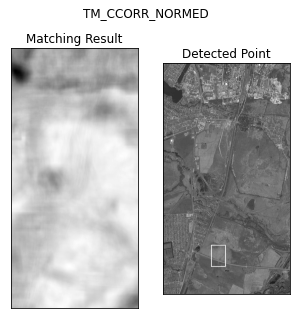

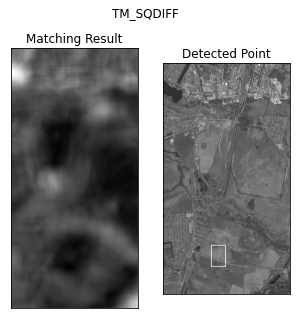

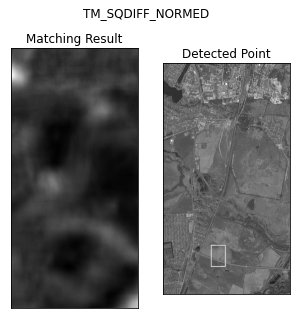

In [6]:
test_and_print_images(satellite_img, sample_img)